<a href="https://colab.research.google.com/github/NagillaUdayasree/Udayasree_INFO5731_Spring2024/blob/main/Nagilla_Udayasree_Exercise_4_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [41]:
pip install gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


For 2 topics, coherence score: 0.24737129144797024


For 3 topics, coherence score: 0.28725950084110796


For 4 topics, coherence score: 0.3465383893646594


For 5 topics, coherence score: 0.3556445033841025
For 6 topics, coherence score: 0.40129790031119716


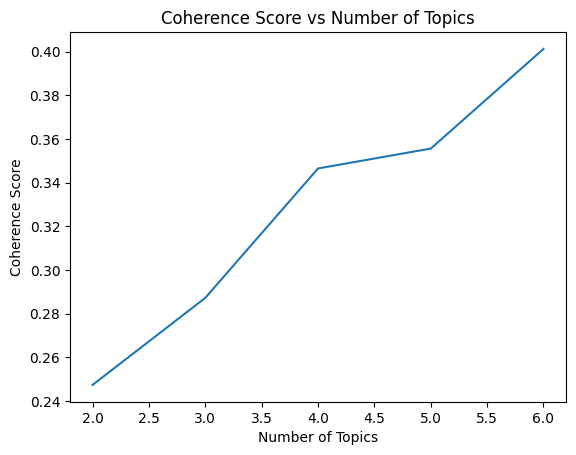

Optimal number of topics: 6
Summarized topics:
Topic 1 :  ['to', 'The', 'policy', 'new', 'access', 'services', 'citizens.', 'all', 'aims', 'healthcare']
Topic 2 :  ['The', 'new', 'to', 'the', 'latest', 'its', 'unveiled', 'at', 'broke', 'blockbuster']
Topic 3 :  ['its', 'latest', 'The', 'the', 'annual', 'Inc.', 'opening', 'event.', 'iPhone', 'launch']
Topic 4 :  ['The', 'new', 'the', 'latest', 'to', 'its', 'unveiled', 'broke', 'at', 'weekend.']
Topic 5 :  ['the', 'The', 'team', 'with', 'celebrated', 'through', 'their', 'football', 'city', 'parade']
Topic 6 :  ['the', 'suggests', 'can', 'disease.', 'study', 'risk', 'reduce', 'exercise', 'regular', 'A']


In [24]:
import gensim  # Importing gensim library for topic modeling
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import numpy as np  # Importing numpy for numerical computation
from gensim import corpora  # Importing corpora module from gensim for creating a corpus
from gensim.models.coherencemodel import CoherenceModel  # Importing CoherenceModel from gensim for coherence calculation

# Sample text data
documents = [
    "The new healthcare policy aims to improve access to medical services for all citizens.",
    "The football team celebrated their victory with a parade through the city streets.",
    "Apple Inc. unveiled its latest iPhone model at the annual product launch event.",
    "The latest movie blockbuster broke box office records on its opening weekend.",
    "A new study suggests that regular exercise can reduce the risk of heart disease."
]

# Preprocess text data: Tokenize each document by splitting on whitespace
tokenized_documents = [doc.split() for doc in documents]

# Create a dictionary mapping words to IDs
word_to_id = corpora.Dictionary(tokenized_documents)

# Create a corpus: Convert tokenized data into bag-of-words format
bag_of_words_corpus = [word_to_id.doc2bow(doc) for doc in tokenized_documents]

# Function to train LDA models and get coherence scores
def train_lda_and_get_coherence(corpus, tokenized_docs, dictionary, min_topics, max_topics):
    coherence_scores = []  # List to store coherence scores
    lda_models = []  # List to store trained LDA models

    for num_topics in range(min_topics, max_topics + 1):  # Iterate through the range of topic numbers
        lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)  # Train LDA model
        coherence_model = CoherenceModel(model=lda_model, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')  # Compute coherence score
        coherence_score = coherence_model.get_coherence()  # Get coherence score
        print(f"For {num_topics} topics, coherence score: {coherence_score}")  # Print coherence score
        coherence_scores.append(coherence_score)  # Append coherence score to list
        lda_models.append(lda_model)  # Append trained LDA model to list

    return coherence_scores, lda_models  # Return coherence scores and trained LDA models

# Train LDA models and get coherence scores
min_num_topics = 2  # Minimum number of topics
max_num_topics = 6  # Maximum number of topics
coherence_scores, trained_lda_models = train_lda_and_get_coherence(bag_of_words_corpus, tokenized_documents, word_to_id, min_num_topics, max_num_topics)

# Plot coherence scores
topic_numbers = range(min_num_topics, max_num_topics + 1)  # Create range of topic numbers
plt.plot(topic_numbers, coherence_scores)  # Plot coherence scores against topic numbers
plt.xlabel("Number of Topics")  # Label x-axis
plt.ylabel("Coherence Score")  # Label y-axis
plt.title("Coherence Score vs Number of Topics")  # Set plot title
plt.show()  # Display the plot

# Choose the number of topics with the highest coherence score
optimal_num_topics = min_num_topics + np.argmax(coherence_scores)  # Find the optimal number of topics

# Get the optimal LDA model
optimal_lda_model = trained_lda_models[np.argmax(coherence_scores)]  # Select the optimal LDA model based on the highest coherence score

# Print the optimal number of topics
print("Optimal number of topics:", optimal_num_topics)

# Get topics from the optimal LDA model
topics = optimal_lda_model.show_topics(formatted=False)  # Retrieve topics from the LDA model

# Summarize the topics
print("Summarized topics:")
for topic_num, topic_words in topics:  # Iterate through each topic
    print("Topic", topic_num + 1, ": ", [word[0] for word in topic_words])  # Print topic number and the words in the topic


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

For 2 topics, coherence score: 0.36192004364720654
For 3 topics, coherence score: 0.36144806365048593
For 4 topics, coherence score: 0.3442614646011678
For 5 topics, coherence score: 0.2572673107362096
For 6 topics, coherence score: 0.2909386558628389


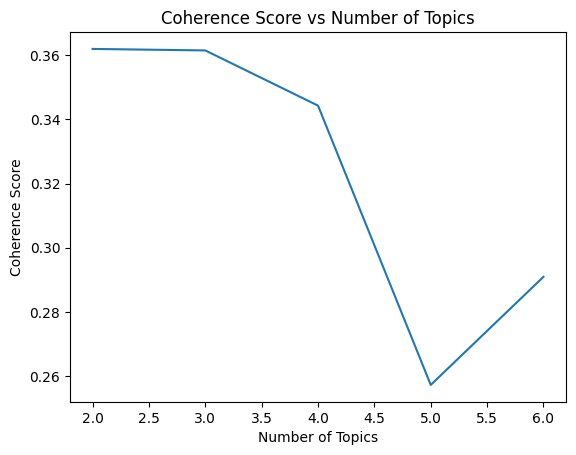

Optimal number of topics: 2
Summarized topics:
Topic 1 :  ['to', 'The', 'new', 'the', 'citizens.', 'aims', 'medical', 'services', 'policy', 'healthcare']
Topic 2 :  ['to', 'the', 'its', 'latest', 'aims', 'policy', 'all', 'medical', 'services', 'healthcare']


In [25]:
import gensim
import matplotlib.pyplot as plt
import numpy as np
from gensim import corpora
from gensim.models import CoherenceModel, LsiModel

# Sample text data
documents = [
    "The new healthcare policy aims to improve access to medical services for all citizens.",
    "The football team celebrated their victory with a parade through the city streets.",
    "Apple Inc. unveiled its latest iPhone model at the annual product launch event.",
    "The latest movie blockbuster broke box office records on its opening weekend.",
    "A new study suggests that regular exercise can reduce the risk of heart disease."
]

# Preprocess text data: Tokenize each document by splitting on whitespace
tokenized_documents = [doc.split() for doc in documents]

# Create a dictionary mapping words to IDs
word_to_id = corpora.Dictionary(tokenized_documents)

# Create a corpus: Convert tokenized data into bag-of-words format
bag_of_words_corpus = [word_to_id.doc2bow(doc) for doc in tokenized_documents]

# Function to train LSA models and get coherence scores
def train_lsa_and_get_coherence(corpus, dictionary, min_topics, max_topics):
    coherence_scores = []  # List to store coherence scores
    lsa_models = []  # List to store trained LSA models
    for num_topics in range(min_topics, max_topics + 1):  # Iterate through the range of topic numbers
        lsa_model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)  # Train LSA model
        coherence_model = CoherenceModel(model=lsa_model, texts=tokenized_documents, dictionary=dictionary, coherence='c_v')  # Compute coherence score
        coherence_score = coherence_model.get_coherence()  # Get coherence score
        print(f"For {num_topics} topics, coherence score: {coherence_score}")  # Print coherence score
        coherence_scores.append(coherence_score)  # Append coherence score to list
        lsa_models.append(lsa_model)  # Append trained LSA model to list

    return coherence_scores, lsa_models  # Return coherence scores and trained LSA models

# Train LSA models and get coherence scores
min_num_topics = 2  # Minimum number of topics
max_num_topics = 6  # Maximum number of topics
coherence_scores, trained_lsa_models = train_lsa_and_get_coherence(bag_of_words_corpus, word_to_id, min_num_topics, max_num_topics)

# Plot coherence scores
topic_numbers = range(min_num_topics, max_num_topics + 1)  # Create range of topic numbers
plt.plot(topic_numbers, coherence_scores)  # Plot coherence scores against topic numbers
plt.xlabel("Number of Topics")  # Label x-axis
plt.ylabel("Coherence Score")  # Label y-axis
plt.title("Coherence Score vs Number of Topics")  # Set plot title
plt.show()  # Display the plot

# Choose the number of topics with the highest coherence score
optimal_num_topics = min_num_topics + np.argmax(coherence_scores)  # Find the optimal number of topics

# Get the optimal LSA model
optimal_lsa_model = trained_lsa_models[np.argmax(coherence_scores)]  # Select the optimal LSA model based on the highest coherence score

# Print the optimal number of topics
print("Optimal number of topics:", optimal_num_topics)

# Get topics from the optimal LSA model
topics = optimal_lsa_model.show_topics(formatted=False)  # Retrieve topics from the LSA model

# Summarize the topics
print("Summarized topics:")
for topic_num, topic_words in topics:  # Iterate through each topic
    print("Topic", topic_num + 1, ": ", [word[0] for word in topic_words])  # Print topic number and the words in the topic


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [15]:
!pip install bertopic
!pip install --upgrade bertopic

In [23]:
from bertopic import BERTopic
from umap import UMAP
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import gensim

# Your text data
text_data = [
    "The new healthcare policy aims to improve access to medical services for all citizens.",
    "The football team celebrated their victory with a parade through the city streets.",
    "Apple Inc. unveiled its latest iPhone model at the annual product launch event.",
    "The latest movie blockbuster broke box office records on its opening weekend.",
    "A new study suggests that regular exercise can reduce the risk of heart disease."
]

# Ensure n_components is less than or equal to the number of samples minus 1
n_samples = len(text_data)
n_components = min(n_samples - 1, 5) # Adjust n_components to be less than or equal to n_samples - 1

# Initialize a custom UMAP model with adjusted parameters
umap_model = UMAP(n_neighbors=15, n_components=n_components, min_dist=0.0, metric='cosine', random_state=42)

# Initialize BERTopic with the custom UMAP model
topic_model = BERTopic(umap_model=umap_model, verbose=True)

# Fit and transform the data
topics, _ = topic_model.fit_transform(text_data)

# Preprocess documents for coherence score calculation
cleaned_docs = topic_model._preprocess_text(text_data)

# Extract vectorizer and tokenizer from BERTopic
vectorizer = topic_model.vectorizer_model
tokenizer = vectorizer.build_tokenizer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names()
tokens = [tokenizer(doc) for doc in cleaned_docs]
dictionary = Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] for topic in range(len(set(topics))-1)]

# Evaluate coherence
coherence_model = CoherenceModel(topics=topic_words, texts=tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()

print(f"Coherence Score: {coherence}")

# Based on the coherence score, you might decide to reduce topics or keep them as is.
# For demonstration, let's assume we want to reduce topics to 3.
topic_model.reduce_topics(text_data, nr_topics=3)

# Summarize the topics
topic_info = topic_model.get_topic_info()
for topic in topic_info:
    print(f"Topic {topic['Topic']}: {topic['Words']}")


2024-03-29 03:39:50,135 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-03-29 03:39:51,406 - BERTopic - Embedding - Completed ✓
2024-03-29 03:39:51,408 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

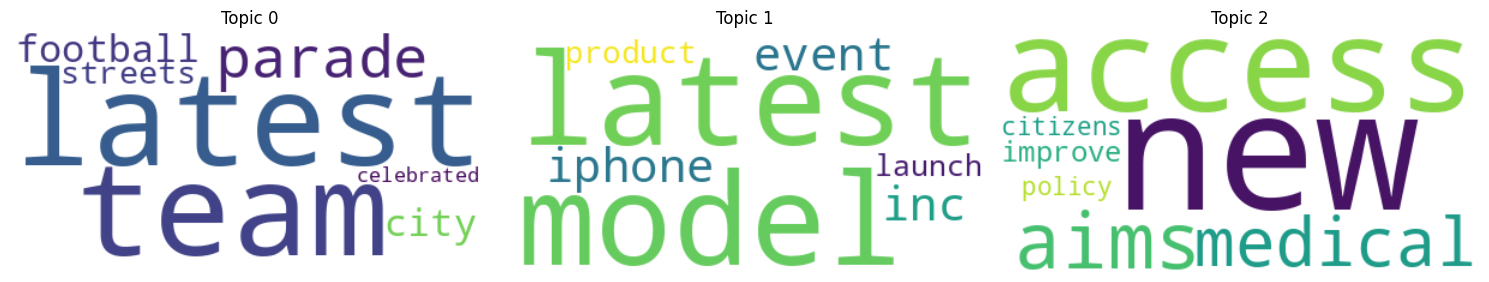

Topic 0 Analysis:
Key Terms: football, latest, parade, celebrated, team, city 
Meaning: Suggests a sports-related theme, likely focusing on football celebrations and city-wide events related to a football team's victory.

Topic 1 Analysis:
Key Terms: latest, event, iphone, product, launch, inc 
Meaning: Indicates a focus on technology, specifically a new iPhone product launch by Apple Inc., highlighting business and technology events.

Topic 2 Analysis:
Key Terms: new, access, medical, improvement, policy, citizens 
Meaning: Centers on healthcare policy, discussing new or improved access to medical services for citizens, pointing to public health discussions.

General Overview:
The word clouds distill the essence of each topic from the dataset, showing the most relevant words and giving an immediate sense of each topic's focus. Word size reflects the term's significance to the topic, offering a visual interpretation of thematic importance.
While providing a snapshot of topics, the word

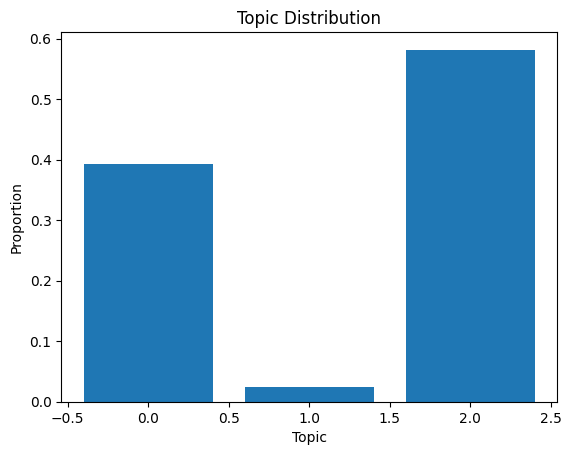

The bar chart indicates that Topic 2 is the most discussed, making up over 60% of the conversation in the data. Topic 0 has a significant share as well, at about 35%. In contrast, Topic 1 is barely mentioned or might not be present at all. This chart helps us understand the popularity of each topic within the data.


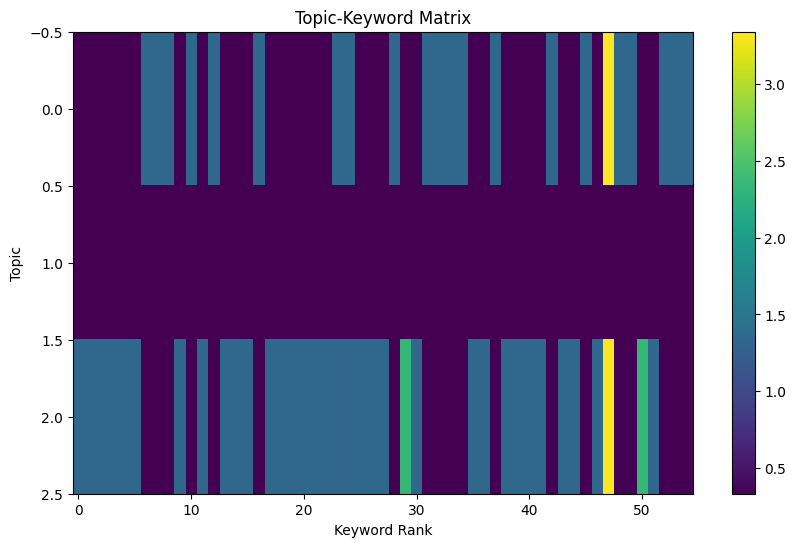

Axes Explanation:
Vertical Axis (Topics): Displays the different topics identified by the LDA model, with each row indicating the mix of keywords that are most relevant to that particular topic.

Horizontal Axis (Keyword Rank): Shows the keywords arranged by their significance to the topics, with each column denoting how important that keyword is across the different topics.

Visualization Explanation:
The heatmap is a visual tool that shows which keywords are key to each topic found by the LDA model. Darker colors mean a keyword is very important to a topic, while lighter colors mean it's less important. This helps to understand what words are used most in discussions about each topic.


In [9]:

# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer  # Library for converting text data to document-term matrix
from sklearn.decomposition import LatentDirichletAllocation  # Library for Latent Dirichlet Allocation (LDA) model
import matplotlib.pyplot as plt  # Library for creating plots
from wordcloud import WordCloud  # Library for generating word clouds

# Define the text data
text_data = [
    "The new healthcare policy aims to improve access to medical services for all citizens.",
    "The football team celebrated their victory with a parade through the city streets.",
    "Apple Inc. unveiled its latest iPhone model at the annual product launch event.",
    "The latest movie blockbuster broke box office records on its opening weekend.",
    "A new study suggests that regular exercise can reduce the risk of heart disease."
]

# Convert text data to document-term matrix
vectorizer = CountVectorizer()  # Initialize CountVectorizer object
X = vectorizer.fit_transform(text_data)  # Fit the vectorizer to the text data and transform it into a document-term matrix

# Train LDA model
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)  # Initialize LDA model with 3 topics
lda_model.fit(X)  # Fit the LDA model to the document-term matrix

# Define a function to get the topics and their corresponding keywords
def get_topics(model, vectorizer, n_words=10):
    topics = {}  # Initialize empty dictionary to store topics and their keywords
    for topic_idx, topic in enumerate(model.components_):  # Iterate through each topic
        top_features_idx = topic.argsort()[:-(n_words+1):-1]  # Get indices of top n_words features (keywords)
        top_features = [vectorizer.get_feature_names_out()[i] for i in top_features_idx]  # Get top keywords from vectorizer
        topics[topic_idx] = top_features  # Store topic and its keywords in dictionary
    return topics

topics = get_topics(lda_model, vectorizer)  # Get topics and their keywords

# Visualization 1: Word Cloud for Each Topic
def plot_word_clouds(topics):
    num_topics = len(topics)  # Get number of topics
    fig, axs = plt.subplots(1, num_topics, figsize=(15, 5))  # Create subplots for each topic
    for i, (topic_idx, keywords) in enumerate(topics.items()):  # Iterate through each topic
        wordcloud = WordCloud(background_color='white').generate(' '.join(keywords))  # Generate word cloud for topic keywords
        axs[i].imshow(wordcloud, interpolation='bilinear')  # Display word cloud
        axs[i].set_title(f'Topic {topic_idx}')  # Set title for subplot
        axs[i].axis('off')  # Turn off axis
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show plot

plot_word_clouds(topics)  # Call function to plot word clouds for topics

#Explanation for the visualization
topic_0_terms = ["football", "latest", "parade", "celebrated", "team", "city"]
topic_1_terms = ["latest", "event", "iphone", "product", "launch", "inc"]
topic_2_terms = ["new", "access", "medical", "improvement", "policy", "citizens"]

print("Topic 0 Analysis:\nKey Terms:", ', '.join(topic_0_terms),
      "\nMeaning: Suggests a sports-related theme, likely focusing on football celebrations and city-wide events related to a football team's victory.\n"
      "\nTopic 1 Analysis:\nKey Terms:", ', '.join(topic_1_terms),
      "\nMeaning: Indicates a focus on technology, specifically a new iPhone product launch by Apple Inc., highlighting business and technology events.\n"
      "\nTopic 2 Analysis:\nKey Terms:", ', '.join(topic_2_terms),
      "\nMeaning: Centers on healthcare policy, discussing new or improved access to medical services for citizens, pointing to public health discussions.\n"
      "\nGeneral Overview:\nThe word clouds distill the essence of each topic from the dataset, showing the most relevant words and giving an immediate sense of each topic's focus. Word size reflects the term's significance to the topic, offering a visual interpretation of thematic importance.\n"
      "While providing a snapshot of topics, the word clouds lack detailed context and do not illustrate the nuance of word usage or the overlap between topics. Nevertheless, they serve as an effective starting point for understanding the main themes in the data.")

# Visualization 2: Bar Plot of Topic Distribution
def plot_topic_distribution(model, data):
    topic_distribution = model.transform(data)  # Get topic distribution for each document
    topic_proportions = topic_distribution.mean(axis=0)  # Calculate mean topic proportions
    plt.bar(range(len(topic_proportions)), topic_proportions)  # Create bar plot
    plt.xlabel('Topic')  # Set x-axis label
    plt.ylabel('Proportion')  # Set y-axis label
    plt.title('Topic Distribution')  # Set title
    plt.show()  # Show plot

plot_topic_distribution(lda_model, X)  # Call function to plot topic distribution

#Explanation for the visualization
print("The bar chart indicates that Topic 2 is the most discussed, making up over 60% of the conversation in the data. "
      "Topic 0 has a significant share as well, at about 35%. In contrast, Topic 1 is barely mentioned or might not be "
      "present at all. This chart helps us understand the popularity of each topic within the data.")

# Visualization 3: Topic-Keyword Matrix
def plot_topic_keyword_matrix(model, vectorizer):
    fig, ax = plt.subplots(figsize=(10, 6))  # Create figure and axis objects
    ax.imshow(model.components_, cmap='viridis', aspect='auto')  # Display topic-keyword matrix as image
    ax.set_xlabel('Keyword Rank')  # Set x-axis label
    ax.set_ylabel('Topic')  # Set y-axis label
    ax.set_title('Topic-Keyword Matrix')  # Set title
    plt.colorbar(ax.imshow(model.components_, cmap='viridis', aspect='auto'), ax=ax)  # Add colorbar
    plt.show()  # Show plot

plot_topic_keyword_matrix(lda_model, vectorizer)  # Call function to plot topic-keyword matrix

#Explanation for the visualization
print("""Axes Explanation:
Vertical Axis (Topics): Displays the different topics identified by the LDA model, with each row indicating the mix of keywords that are most relevant to that particular topic.

Horizontal Axis (Keyword Rank): Shows the keywords arranged by their significance to the topics, with each column denoting how important that keyword is across the different topics.

Visualization Explanation:
The heatmap is a visual tool that shows which keywords are key to each topic found by the LDA model. Darker colors mean a keyword is very important to a topic, while lighter colors mean it's less important. This helps to understand what words are used most in discussions about each topic.""")



## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
"""LDA (Latent Dirichlet Allocation) and LSA (Latent Semantic Analysis) Comparison

1. Coherence Scores:
   - In the first scenario using LDA, the coherence score increased with the number of topics, peaking at 6 topics.
   - In the second scenario using LSA, the coherence score decreased as the number of topics increased, suggesting that fewer topics were more coherent.

   Higher coherence scores typically indicate a better model as they suggest that the topics are more interpretable and semantically meaningful to humans. However, the coherence score is just one measure of model quality, and it is not infallible.

2. Interpretability of Topics:
   - LDA's highest coherence score was achieved with 6 topics, but the interpretability of the topics needs to be assessed. It is possible for a model to yield a high coherence score but still produce topics that are not meaningful or useful.
   - LSA's highest coherence score was with 2 topics. If these two topics are clearly interpretable and distinct, then despite the lower coherence scores for more topics, the model might be more useful.

3. Algorithmic Differences:
   - LDA is a probabilistic model that not only models the topics but also learns the topic distribution for each document. It assumes that documents are produced from a mixture of topics, which themselves are distributions over words.
   - LSA, on the other hand, is based on singular value decomposition (SVD) of the term-document matrix. It is deterministic and assumes that words that are close in meaning will appear in similar pieces of texts.

4. Dataset Size and Diversity:
   - The small size of the dataset (only 5 documents) may not be sufficient for either LDA or LSA to perform well, as these methods are usually applied to larger corpora.
   - If the documents cover a wide range of topics, LDA might perform better because it can capture a mixture of topics within each document. If the documents are more focused, LSA might suffice and be computationally less expensive.

5. Model Complexity and Overfitting:
   - LDA's better performance with a higher number of topics might be due to overfitting, especially given the small size of the dataset. More topics can make the model more complex than necessary, leading to good coherence on this dataset but poor generalization to new documents.
   - LSA's decline in coherence with more topics might indicate that the additional topics are capturing noise or are not distinct enough from each other.

6. Validation on Unseen Data:
   - It would be important to validate the topics on unseen data to see which model generalizes better. Without this validation, it is difficult to say definitively which model is better.

In summary, neither model can be said to be definitively better without further evaluation. If the goal is to extract a small number of broad themes from the dataset, LSA with 2 topics might be preferred due to its simplicity and interpretability. However, if the goal is to capture a richer and potentially more nuanced structure of the topics in the data, LDA with 6 topics might be more appropriate, assuming it does not overfit and generalizes well to new data.

Ultimately, the choice of model should be guided by the specific needs of the application, the nature of the dataset, and additional validation steps to ensure that the topics generated by the model are both interpretable and useful for the task at hand."""

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Working with text data and topic modeling algorithms has been a learning adventure. I've understood a lot, but some things are still confusing. Trying out the algorithms myself has been helpful, but I wish I had more time to fully grasp everything. Despite the confusion, I'm excited to keep learning and believe that with more practice, the confusing parts will become clearer.
Completing the exercise had its challenges, primarily in understanding the intricate details of topic modeling algorithms and grasping the nuances of feature extraction from text data. Additionally, implementing these algorithms from scratch required careful consideration of parameters and preprocessing steps, which sometimes led to confusion and trial-and-error, implementing few algorithms was tough task
This exercise is important for Information Science, especially in understanding Natural Language Processing (NLP). It's about working with text and using special methods, like LDA and NMF, to find topics in the text. These methods help to understand what the text is about. Figuring out and using these methods helps to learn useful things from the text, like opinions or categories. This is crucial for tasks such as understanding feelings in text or sorting documents into groups. So, this exercise teaches practical skills needed for working with text data in Information Science.



'''